## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
df_train_orig = pd.read_csv("./content/train_dataset_train.csv")
df_sample_solution = pd.read_csv("./content/sample_solution.csv")

df_named = pd.read_csv("./content/named.csv")
df_type_contract = pd.read_csv("./content/type_contract.csv")
df_log = pd.read_csv("./content/log.csv")

## Рассмотрим датасет по ближе

In [5]:
df_train.head(3)

,contract_id,blocked
0,7780,0
1,7785,0
2,7794,0


In [6]:
df_named.head(3)

,date,url,contract_id
0,17-Apr-2021,webmail.sampo.ru,101397
1,17-Apr-2021,webmail.sampo.ru,179624
2,17-Apr-2021,tvip-provision.sampo.ru,190335


In [7]:
df_type_contract.head(3)

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0


In [8]:
df_log.head(3)

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета


Узнаем размерность наборов

In [9]:
print("df_train", df_train.shape)
print("df_named", df_named.shape)
print("df_sample_solution", df_sample_solution.shape)
print("df_type_contract", df_type_contract.shape)
print("df_log", df_log.shape)

df_train (5992, 2)
df_named (10646537, 3)
df_sample_solution (810, 2)
df_type_contract (6805, 2)
df_log (25274, 3)


### Видоизмение данных

Обьединим два набора с данными

In [10]:
df_train = pd.merge(df_train, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")

df_train.head(3)

,contract_id,blocked,day_or_month_contract
0,7780,0,0.0
1,7785,0,0.0
2,7794,0,0.0


Добавим столбец - количество обращений человека

In [11]:
count_log = df_log.groupby("contract_id").count()

count_log.head(3)

,event_date,event_type
contract_id,,
3453,1,1
3454,1,1
3456,4,4


In [12]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5990 non-null   float64
 3   event_date             3809 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 234.1 KB


Заменим пропуски на нули

In [14]:
df_train = df_train.fillna(0)

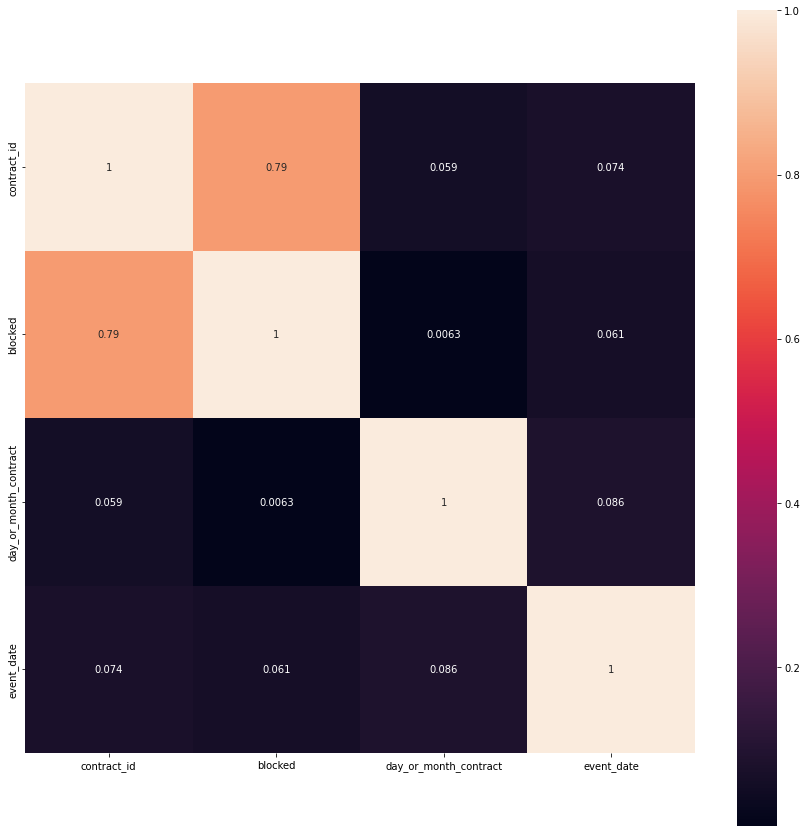

In [15]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [16]:
X = df_train.drop(["contract_id", "blocked"], axis = 1)
y = df_train[["blocked"]]

In [42]:
X

,day_or_month_contract,event_date
0,0.0,9.0
1,0.0,1.0
2,0.0,0.0
3,1.0,7.0
4,0.0,3.0
...,...,...
5987,1.0,6.0
5988,0.0,7.0
5989,0.0,8.0
5990,1.0,9.0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_or_month_contract  5992 non-null   float64
 1   event_date             5992 non-null   float64
dtypes: float64(2)
memory usage: 140.4 KB


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [19]:
clf = RandomForestClassifier(random_state=0)

In [20]:
clf.fit(X_train, y_train)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_19488\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

## Оценка точности

In [21]:
pred = clf.predict(X_val)

In [22]:
y_val.head(3)

,blocked
2404,0
1916,0
2503,0


In [23]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_val, pred, average='macro'))

Recall score: 0.49873817034700313


## Выдаем результат

In [24]:
df_sample_solution.head()

,contract_id,blocked
0,3453,0
1,3454,0
2,3455,0
3,3456,0
4,3457,0


In [25]:
df_type_contract.head()

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0
3,7794,0
4,7795,1


In [34]:
df_test = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")

In [35]:
df_test

,contract_id,blocked,day_or_month_contract
0,3453,0,0
1,3454,0,1
2,3455,0,1
3,3456,0,0
4,3457,0,0
...,...,...,...
809,4258,0,1
810,4259,0,1
811,4260,0,0
812,4261,0,0


In [36]:
df_test = pd.merge(df_test, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [37]:
df_test

,contract_id,blocked,day_or_month_contract,event_date
0,3453,0,0,1.0
1,3454,0,1,1.0
2,3455,0,1,NaN
3,3456,0,0,4.0
4,3457,0,0,4.0
...,...,...,...,...
805,4258,0,1,3.0
806,4259,0,1,NaN
807,4260,0,0,3.0
808,4261,0,0,18.0


In [38]:
df_test = df_test.fillna(0)

In [40]:
df_test = df_test.set_index('contract_id')

In [56]:
len(df_test)

810

In [57]:
X = df_test.drop(["blocked"], axis = 1)
y = df_test[["blocked"]]

In [77]:
len(X)

810

In [61]:
pred = clf.predict(X)

In [62]:
len(pred)

810

In [63]:
df_submission = y

In [64]:
df_submission = df_submission.reset_index()

In [65]:
df_submission['blocked'] = pred

In [68]:
df_submission['blocked'].nunique()

2

In [69]:
df_submission

,contract_id,blocked
0,3453,0
1,3454,0
2,3455,0
3,3456,0
4,3457,0
...,...,...
805,4258,0
806,4259,0
807,4260,0
808,4261,0


## Еще одно решение - c помощью CatBoost

In [94]:
df_train_orig = pd.read_csv("./content/train_dataset_train.csv")
df_sample_solution = pd.read_csv("./content/sample_solution.csv")

df_named = pd.read_csv("./content/named.csv")
df_type_contract = pd.read_csv("./content/type_contract.csv")
df_log = pd.read_csv("./content/log.csv")

In [95]:
df_train = pd.merge(df_train_orig, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")

In [96]:
count_log = df_log.groupby("contract_id").count()

In [97]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [101]:
df_train = df_train.fillna(0)

In [102]:
df_train = df_train.set_index('contract_id')

In [104]:
X = df_train.drop(["blocked"], axis = 1)
y = df_train[["blocked"]]

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(X_train,y_train)
xg.score(X_train, y_train)

O:\!P\!P00_AI_hack_ai\hack_ai_venv\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.885789222699094

In [107]:
pred = xg.predict(X_val)

In [108]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_val, pred, average='macro'))

Recall score: 0.4993690851735016


In [78]:
df_test = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_test = pd.merge(df_test, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)
df_test = df_test.fillna(0)
df_test = df_test.set_index('contract_id')
X = df_test.drop(["blocked"], axis = 1)
y = df_test[["blocked"]]

In [79]:
pred = xg.predict(X)

In [81]:
len(pred)

810

In [82]:
df_submission = y
df_submission = df_submission.reset_index()
df_submission['blocked'] = pred
df_submission = df_submission[['contract_id', 'blocked']]
df_submission.to_csv("./content/RSF_submission2.csv", index=False)

In [70]:
df_submission = df_submission[['contract_id', 'blocked']]
df_submission.to_csv("./content/RSF_submission.csv", index=False)